In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as GBM

from sklearn.inspection import PartialDependenceDisplay

In [2]:
# Simulate a regression dataset:

X, y = make_regression(
    n_samples=100, 
    n_features=20, 
    n_informative=5, 
    n_targets=1,
    random_state=42
)

In [3]:
# Instantiate Random Forest Regressor with default hyperparameter values:

gbm = GBM()

# Fit GBM:

gbm.fit(X,y)

GradientBoostingRegressor()

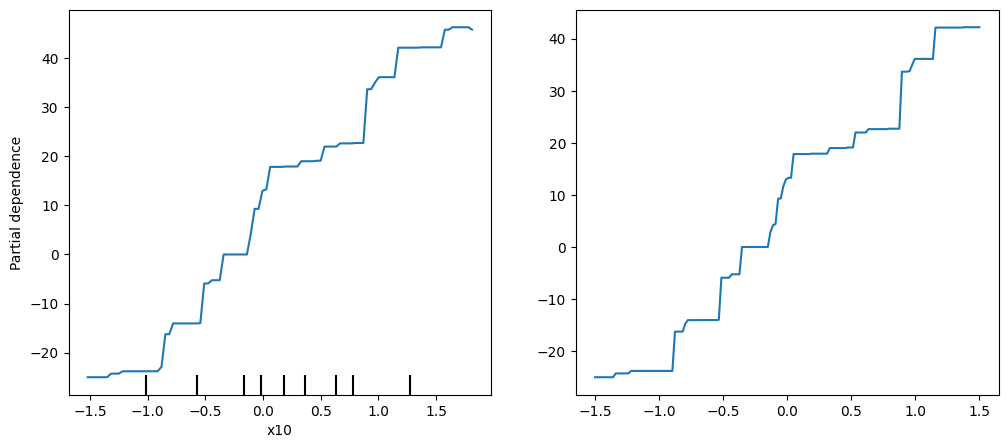

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Create a one-way PDP of the first feature using sklearn's PDP module:

PartialDependenceDisplay.from_estimator(
    estimator=gbm, 
    X=X,
    features=[10],
    method='brute',
    ax=ax[0]
)

# Create PDP plot "by hand":

x_vals = np.linspace(-1.5,1.5,num=150)
PD_vals = []

X_alt = X.copy()

for x in x_vals:
    X_alt[:,10]=x
    PD_vals.append(gbm.predict(X_alt).mean())
    
ax[1].plot(x_vals, PD_vals)

# Show the plots side by side:

plt.show();